## Model uses 1/5/1996 - 3/27/2015, need to find new parameters, but use same 3 variables

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureascenariostimemachine.csv")
#model part
df_96on = data[['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change','Urea']][0:1004]
df_96on.tail()

,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea
999,2/27/2015,52.14,393.25,71.05,52.14,393.25,71.05,317
1000,3/6/2015,51.47,386.00,65.50,51.47,386.00,65.50,310
1001,3/13/2015,47.06,380.50,64.95,47.06,380.50,64.95,298
1002,3/20/2015,46.57,392.75,64.05,46.57,392.75,64.05,298
1003,3/27/2015,50.50,399.00,63.30,50.50,399.00,63.30,298


In [3]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date            datetime64[ns]
Crude_Same             float64
Corn_Same              float64
Coal_Same              float64
Crude_Change           float64
Corn_Change            float64
Coal_Change            float64
Urea                   float64
dtype: object

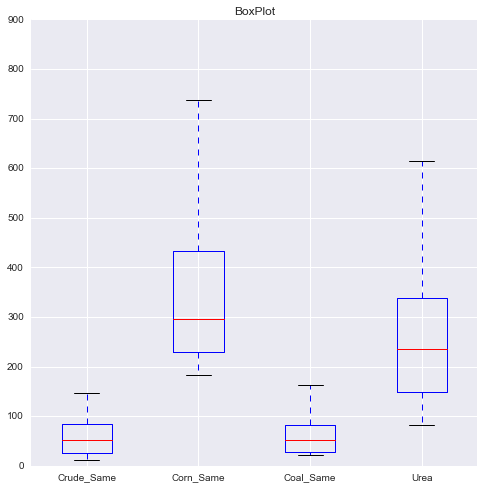

In [4]:
plt.show(df_96on[['Crude_Same','Corn_Same','Coal_Same','Urea']].plot(kind='box',figsize=(8,8),title=('BoxPlot')))
#no apparent outliers

In [5]:
df_96on.corr()

,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea
Crude_Same,1.000000,0.782858,0.896400,1.000000,0.782858,0.896400,0.874776
Corn_Same,0.782858,1.000000,0.836953,0.782858,1.000000,0.836953,0.801983
Coal_Same,0.896400,0.836953,1.000000,0.896400,0.836953,1.000000,0.884740
Crude_Change,1.000000,0.782858,0.896400,1.000000,0.782858,0.896400,0.874776
Corn_Change,0.782858,1.000000,0.836953,0.782858,1.000000,0.836953,0.801983
Coal_Change,0.896400,0.836953,1.000000,0.896400,0.836953,1.000000,0.884740
Urea,0.874776,0.801983,0.884740,0.874776,0.801983,0.884740,1.000000


### Model Creations 

In [6]:
#MLR model
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1567.
Date:                Mon, 02 May 2016   Prob (F-statistic):               0.00
Time:                        08:17:17   Log-Likelihood:                -5504.9
No. Observations:                1004   AIC:                         1.102e+04
Df Residuals:                    1000   BIC:                         1.104e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         20.7721      4.587      4.529      0.000        11.771    29.773
Crude_Same     1.6896      0.131     12.891      0.000         1.432     1.947
Corn_Same      0.1407      0.021      6.673      0.000         0.099     0.182
Coal_Same      1.6112      0.138     11.662      0.000         1.340     1.882
==============================================================================
Omnibus:                      323.498   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1823.713
Skew:                           1.363   Prob(JB):                         0.00
Kurtosis:                       9.014   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
#find RDF with new parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [8]:
from sklearn import metrics
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV

def fit_predict_model(X_train,y_train,):
    """Find and tune the optimal model. Make a prediction on urea data"""
    
    # Setup a Random Forest Regressor
    regressor = RandomForestRegressor()

    parameters = {'n_estimators':(100,125,150,175,200),
                  'max_depth':(5,6,7,8,9,10)}

    mse_scorer = metrics.make_scorer(metrics.mean_squared_error, greater_is_better = False)
    
    # use grid search to fine tune the RandomForests Regressor and
    # obtain the parameters that generate the best training performance. 
    reg = grid_search.GridSearchCV(regressor, param_grid=parameters,
                                   scoring=mse_scorer, cv = 10)
    
    # Fit the learner to the training data to obtain the best parameter set
    print ("Final Model: ")
    print (reg.fit(X_train, y_train))
    return reg

In [11]:
#do multiple times to see what parameters are the best
rdf_model_ureaall = fit_predict_model(X_train,y_train)
print (rdf_model_ureaall.best_estimator_)

Final Model: 
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': (5, 6, 7, 8, 9, 10), 'n_estimators': (100, 125, 150, 175, 200)},
       pre_dispatch='2*n_jobs', refit=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [12]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 294.463, test: 606.419
R^2 train: 0.986, test: 0.963
[ 0.58750355  0.08897371  0.32352274]


In [13]:
#this part of models prediction same for urea_pred_crudechange, crudedown, cornchange, coalchange
#crude
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_CrudeChange_RDF'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_CrudeChange_RDF'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Error'] = rdf_error3

#corn
urea_predicted5 = forest.predict(X)
urea_predicted5 = pd.DataFrame(urea_predicted5)
df_96on['Urea_Pred_CornChange_RDF'] = urea_predicted5

#coal
urea_predicted7 = forest.predict(X)
urea_predicted7 = pd.DataFrame(urea_predicted7)
df_96on['Urea_Pred_CoalChange_RDF'] = urea_predicted7

#same
urea_predicted9 = forest.predict(X)
urea_predicted9 = pd.DataFrame(urea_predicted9)
df_96on['Urea_Pred_Same_RDF'] = urea_predicted9

print("Average RDF error is: %.3f" % (rdf_error3.mean()))
df_96on

Average RDF error is: 5.215


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea,Urea_Pred_CrudeChange_RDF,RDF_Error,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,1996-01-05,19.65,369.75,25.358912,19.65,369.75,25.358912,220,201.153976,8.566374,201.153976,201.153976,201.153976
1,1996-01-12,17.98,366.25,25.269689,17.98,366.25,25.269689,220,211.055556,4.065657,211.055556,211.055556,211.055556
2,1996-01-19,18.25,365.00,29.070713,18.25,365.00,29.070713,218,199.029333,8.702141,199.029333,199.029333,199.029333
3,1996-01-26,17.36,360.25,29.195096,17.36,360.25,29.195096,215,194.696000,9.443721,194.696000,194.696000,194.696000
4,1996-02-02,17.38,370.50,32.105527,17.38,370.50,32.105527,205,194.470667,5.136260,194.470667,194.470667,194.470667
5,1996-02-09,17.38,367.25,28.667889,17.38,367.25,28.667889,205,196.016000,4.382439,196.016000,196.016000,196.016000
6,1996-02-16,18.40,382.75,28.169393,18.40,382.75,28.169393,210,197.653333,5.879365,197.653333,197.653333,197.653333
7,1996-02-23,18.45,383.50,28.828182,18.45,383.50,28.828182,210,202.040000,3.790476,202.040000,202.040000,202.040000
8,1996-03-01,18.62,386.75,27.863549,18.62,386.75,27.863549,210,191.766667,8.682540,191.766667,191.766667,191.766667
9,1996-03-08,18.87,388.50,26.513218,18.87,388.50,26.513218,205,187.004798,8.778147,187.004798,187.004798,187.004798


In [17]:
#predictions part
newpred = data[['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change']][1004:1056]
newpred2 = data[['Crude_Change','Corn_Same','Coal_Same']][1004:1056]
newpred4 = data[['Crude_Same','Corn_Change','Coal_Same']][1004:1056]
newpred6 = data[['Crude_Same','Corn_Same','Coal_Change']][1004:1056]
newpred8 = data[['Crude_Same','Corn_Same','Coal_Same']][1004:1056]

In [18]:
#new predictions
X = df_96on[['Crude_Change','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred = np.array(newpred)
newpred = pd.DataFrame(newpred)
newpred.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change']
newpred_predicted = forest.predict(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred['Urea_Pred_CrudeChange_RDF'] = df_new_pred

newpred['Date'] = pd.to_datetime(newpred['Date'])
newpred

MSE train: 320.332, test: 593.157
R^2 train: 0.984, test: 0.964
[ 0.60140064  0.10193124  0.29666812]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF
0,2015-04-03,50.5,399,63.3,58.9,369.75,58.55,302.497997
1,2015-04-10,50.5,399,63.3,58.9,369.75,58.55,302.497997
2,2015-04-17,50.5,399,63.3,58.9,369.75,58.55,302.497997
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,302.497997
4,2015-05-01,50.5,399,63.3,60.6,357.25,60.05,300.235641
5,2015-05-08,50.5,399,63.3,60.6,357.25,60.05,300.235641
6,2015-05-15,50.5,399,63.3,60.6,357.25,60.05,300.235641
7,2015-05-22,50.5,399,63.3,60.6,357.25,60.05,300.235641
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,300.235641
9,2015-06-05,50.5,399,63.3,59.97,392.5,60.2,300.692896


In [19]:
X = df_96on[['Crude_Same','Corn_Change','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted3 = forest.predict(newpred4)
df_new_pred3 = pd.DataFrame(newpred_predicted3)
newpred['Urea_Pred_CornChange_RDF'] = df_new_pred3

newpred

MSE train: 308.165, test: 598.369
R^2 train: 0.985, test: 0.963
[ 0.6247282   0.09437813  0.28089366]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF
0,2015-04-03,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967
1,2015-04-10,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967
2,2015-04-17,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967
4,2015-05-01,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904
5,2015-05-08,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904
6,2015-05-15,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904
7,2015-05-22,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904
9,2015-06-05,50.5,399,63.3,59.97,392.5,60.2,300.692896,301.643771


In [20]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Change']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted5 = forest.predict(newpred6)
df_new_pred5 = pd.DataFrame(newpred_predicted5)
newpred['Urea_Pred_CoalChange_RDF'] = df_new_pred5

newpred

MSE train: 317.786, test: 626.781
R^2 train: 0.985, test: 0.962
[ 0.60939932  0.09208466  0.29851602]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF
0,2015-04-03,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423
1,2015-04-10,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423
2,2015-04-17,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423
4,2015-05-01,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827
5,2015-05-08,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827
6,2015-05-15,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827
7,2015-05-22,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827
9,2015-06-05,50.5,399,63.3,59.97,392.5,60.2,300.692896,301.643771,323.053827


In [21]:
X = df_96on[['Crude_Same','Corn_Same','Coal_Same']].values 
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred_predicted7 = forest.predict(newpred8)
df_new_pred7 = pd.DataFrame(newpred_predicted7)
newpred['Urea_Pred_Same_RDF'] = df_new_pred7

newpred

MSE train: 307.909, test: 598.177
R^2 train: 0.985, test: 0.963
[ 0.58007773  0.08945835  0.33046392]


,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,2015-04-03,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423,297.822874
1,2015-04-10,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423,297.822874
2,2015-04-17,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423,297.822874
3,2015-04-24,50.5,399,63.3,58.9,369.75,58.55,302.497997,295.268967,321.894423,297.822874
4,2015-05-01,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827,297.822874
5,2015-05-08,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827,297.822874
6,2015-05-15,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827,297.822874
7,2015-05-22,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827,297.822874
8,2015-05-29,50.5,399,63.3,60.6,357.25,60.05,300.235641,290.461904,323.053827,297.822874
9,2015-06-05,50.5,399,63.3,59.97,392.5,60.2,300.692896,301.643771,323.053827,297.822874


In [22]:
frames = [df_96on,newpred]
combined = pd.concat(frames)
combined

,Coal_Change,Coal_Same,Corn_Change,Corn_Same,Crude_Change,Crude_Same,Date,RDF_Error,Urea,Urea_Pred_CoalChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CrudeChange_RDF,Urea_Pred_Same_RDF
0,25.3589,25.3589,369.75,369.75,19.65,19.65,1996-01-05,8.566374,220,201.153976,201.153976,201.153976,201.153976
1,25.2697,25.2697,366.25,366.25,17.98,17.98,1996-01-12,4.065657,220,211.055556,211.055556,211.055556,211.055556
2,29.0707,29.0707,365,365,18.25,18.25,1996-01-19,8.702141,218,199.029333,199.029333,199.029333,199.029333
3,29.1951,29.1951,360.25,360.25,17.36,17.36,1996-01-26,9.443721,215,194.696000,194.696000,194.696000,194.696000
4,32.1055,32.1055,370.5,370.5,17.38,17.38,1996-02-02,5.136260,205,194.470667,194.470667,194.470667,194.470667
5,28.6679,28.6679,367.25,367.25,17.38,17.38,1996-02-09,4.382439,205,196.016000,196.016000,196.016000,196.016000
6,28.1694,28.1694,382.75,382.75,18.4,18.4,1996-02-16,5.879365,210,197.653333,197.653333,197.653333,197.653333
7,28.8282,28.8282,383.5,383.5,18.45,18.45,1996-02-23,3.790476,210,202.040000,202.040000,202.040000,202.040000
8,27.8635,27.8635,386.75,386.75,18.62,18.62,1996-03-01,8.682540,210,191.766667,191.766667,191.766667,191.766667
9,26.5132,26.5132,388.5,388.5,18.87,18.87,1996-03-08,8.778147,205,187.004798,187.004798,187.004798,187.004798


In [23]:
combined = combined[['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_Same_RDF']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude_Same','Corn_Same','Coal_Same','Crude_Change','Corn_Change','Coal_Change','Urea','Urea_Pred_CrudeChange_RDF','Urea_Pred_CornChange_RDF','Urea_Pred_CoalChange_RDF','Urea_Pred_Same_RDF']
combined

,Date,Crude_Same,Corn_Same,Coal_Same,Crude_Change,Corn_Change,Coal_Change,Urea,Urea_Pred_CrudeChange_RDF,Urea_Pred_CornChange_RDF,Urea_Pred_CoalChange_RDF,Urea_Pred_Same_RDF
0,1996-01-05 00:00:00,19.65,369.75,25.3589,19.65,369.75,25.3589,220,201.154,201.154,201.154,201.154
1,1996-01-12 00:00:00,17.98,366.25,25.2697,17.98,366.25,25.2697,220,211.056,211.056,211.056,211.056
2,1996-01-19 00:00:00,18.25,365,29.0707,18.25,365,29.0707,218,199.029,199.029,199.029,199.029
3,1996-01-26 00:00:00,17.36,360.25,29.1951,17.36,360.25,29.1951,215,194.696,194.696,194.696,194.696
4,1996-02-02 00:00:00,17.38,370.5,32.1055,17.38,370.5,32.1055,205,194.471,194.471,194.471,194.471
5,1996-02-09 00:00:00,17.38,367.25,28.6679,17.38,367.25,28.6679,205,196.016,196.016,196.016,196.016
6,1996-02-16 00:00:00,18.4,382.75,28.1694,18.4,382.75,28.1694,210,197.653,197.653,197.653,197.653
7,1996-02-23 00:00:00,18.45,383.5,28.8282,18.45,383.5,28.8282,210,202.04,202.04,202.04,202.04
8,1996-03-01 00:00:00,18.62,386.75,27.8635,18.62,386.75,27.8635,210,191.767,191.767,191.767,191.767
9,1996-03-08 00:00:00,18.87,388.5,26.5132,18.87,388.5,26.5132,205,187.005,187.005,187.005,187.005


In [24]:
combined.to_csv("C:/Users/msteinme/Documents/ureascenariotimemachineresults.csv")

In [25]:
#all change
print(forest.predict([58.9,369.75,58.55]))
print(forest.predict([60.6,357.25,60.05]))
print(forest.predict([59.97,392.5,60.2]))
print(forest.predict([47.53,381.25,60.3]))
print(forest.predict([45.98,375,58.5]))
print(forest.predict([46.19,400.25,57.55]))
print(forest.predict([47.47,391.5,53.05]))
print(forest.predict([43.06,367.25,52.85]))
print(forest.predict([39.11,370.75,52.1]))
print(forest.predict([35.28,376.75,48.8]))
print(forest.predict([34.58,359.5,50.45]))
print(forest.predict([40.63,374.5,51.75]))

[ 300.39828376]
[ 288.40688986]
[ 317.75992848]
[ 316.60427857]
[ 313.66856818]
[ 325.06313569]
[ 318.61014907]
[ 292.05582769]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single


[ 179.44772165]
[ 183.69390535]
[ 182.29406665]
[ 212.82955576]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single